In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_json("/content/News_Category_Dataset_v3.json",lines=True)#json file
data

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [ ]:
data.info()#information about dataset like datatype,column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
data.columns#col names

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [ ]:
data.describe()

,date
count,209527
mean,2015-04-30 00:44:14.344308736
min,2012-01-28 00:00:00
25%,2013-08-10 00:00:00
50%,2015-03-16 00:00:00
75%,2016-11-01 00:00:00
max,2022-09-23 00:00:00


In [ ]:
data.shape#no.of rows and cols

(209527, 6)

In [ ]:
#null values
data.isnull().sum()#find null values
#data['headline]=data['headline].fillna("missing headline")

,0
link,0
headline,0
category,0
short_description,0
authors,0
date,0


In [ ]:
#re(Regular Expression) library in python allowing for pattern matching(finding,extracting text using re and manipulation string(performing operation on string).
import re
#1.finding all digits in a string
example='my phone 4356 number is 12345'
result=re.findall(r"\d+",example)#find the numbers:findall()
print(result)
#2.replacing characters
ex2="the rain in spain"
r2=re.sub('i','5',ex2)#replace the character:sub()
print(r2)
#3.pattern search
ex3="sam and sidd are learning new concepts"
r3=re.search(r"python",ex3)#finding the text:search()
print(r3)


['4356', '12345']
the ra5n 5n spa5n
None


In [ ]:
'''preprocessing the headline by removing the punctations,numbers and links to make them suitable for ML model
step 1: convert to lowecase
step 2:remove the links or URL
step 3: remove the punctuation
step 4: remove the numbers
'''
import string
def clean_text(text):
  text=text.lower()
  text=re.sub(r'https\S+|www\S+|https\S+','',text)
  text=text.translate(str.maketrans('','',string.punctuation))
  text=re.sub(r"\d+",'',text)
  return text
data['clean_headline']=data['headline'].apply(clean_text)
data.head()

,link,headline,category,short_description,authors,date,clean_headline
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,over million americans roll up sleeves for om...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,american airlines flyer charged banned for lif...
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,of the funniest tweets about cats and dogs th...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,the funniest tweets from parents this week sept
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,woman who called cops on black birdwatcher los...


In [ ]:
x=data['clean_headline']#input or features
y=data['category']#target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#split the dataset into training set and testing set



In [ ]:
#stopwords=english common words in english like the,are,is are ignored because they don't add any value or any info.
#max_features=5000 -- it will only keep the top 5000 most important words based on frequnecy.["economy","funniest"...upto 5000 words]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',max_features=5000)#loading the lib
x_train_tfidf=vectorizer.fit_transform(x_train)#transform the data of training set
x_test_tfidf=vectorizer.transform(x_test)#transform the testing set same as training set


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=300)
model.fit(x_train_tfidf,y_train)

LogisticRegression(max_iter=300)

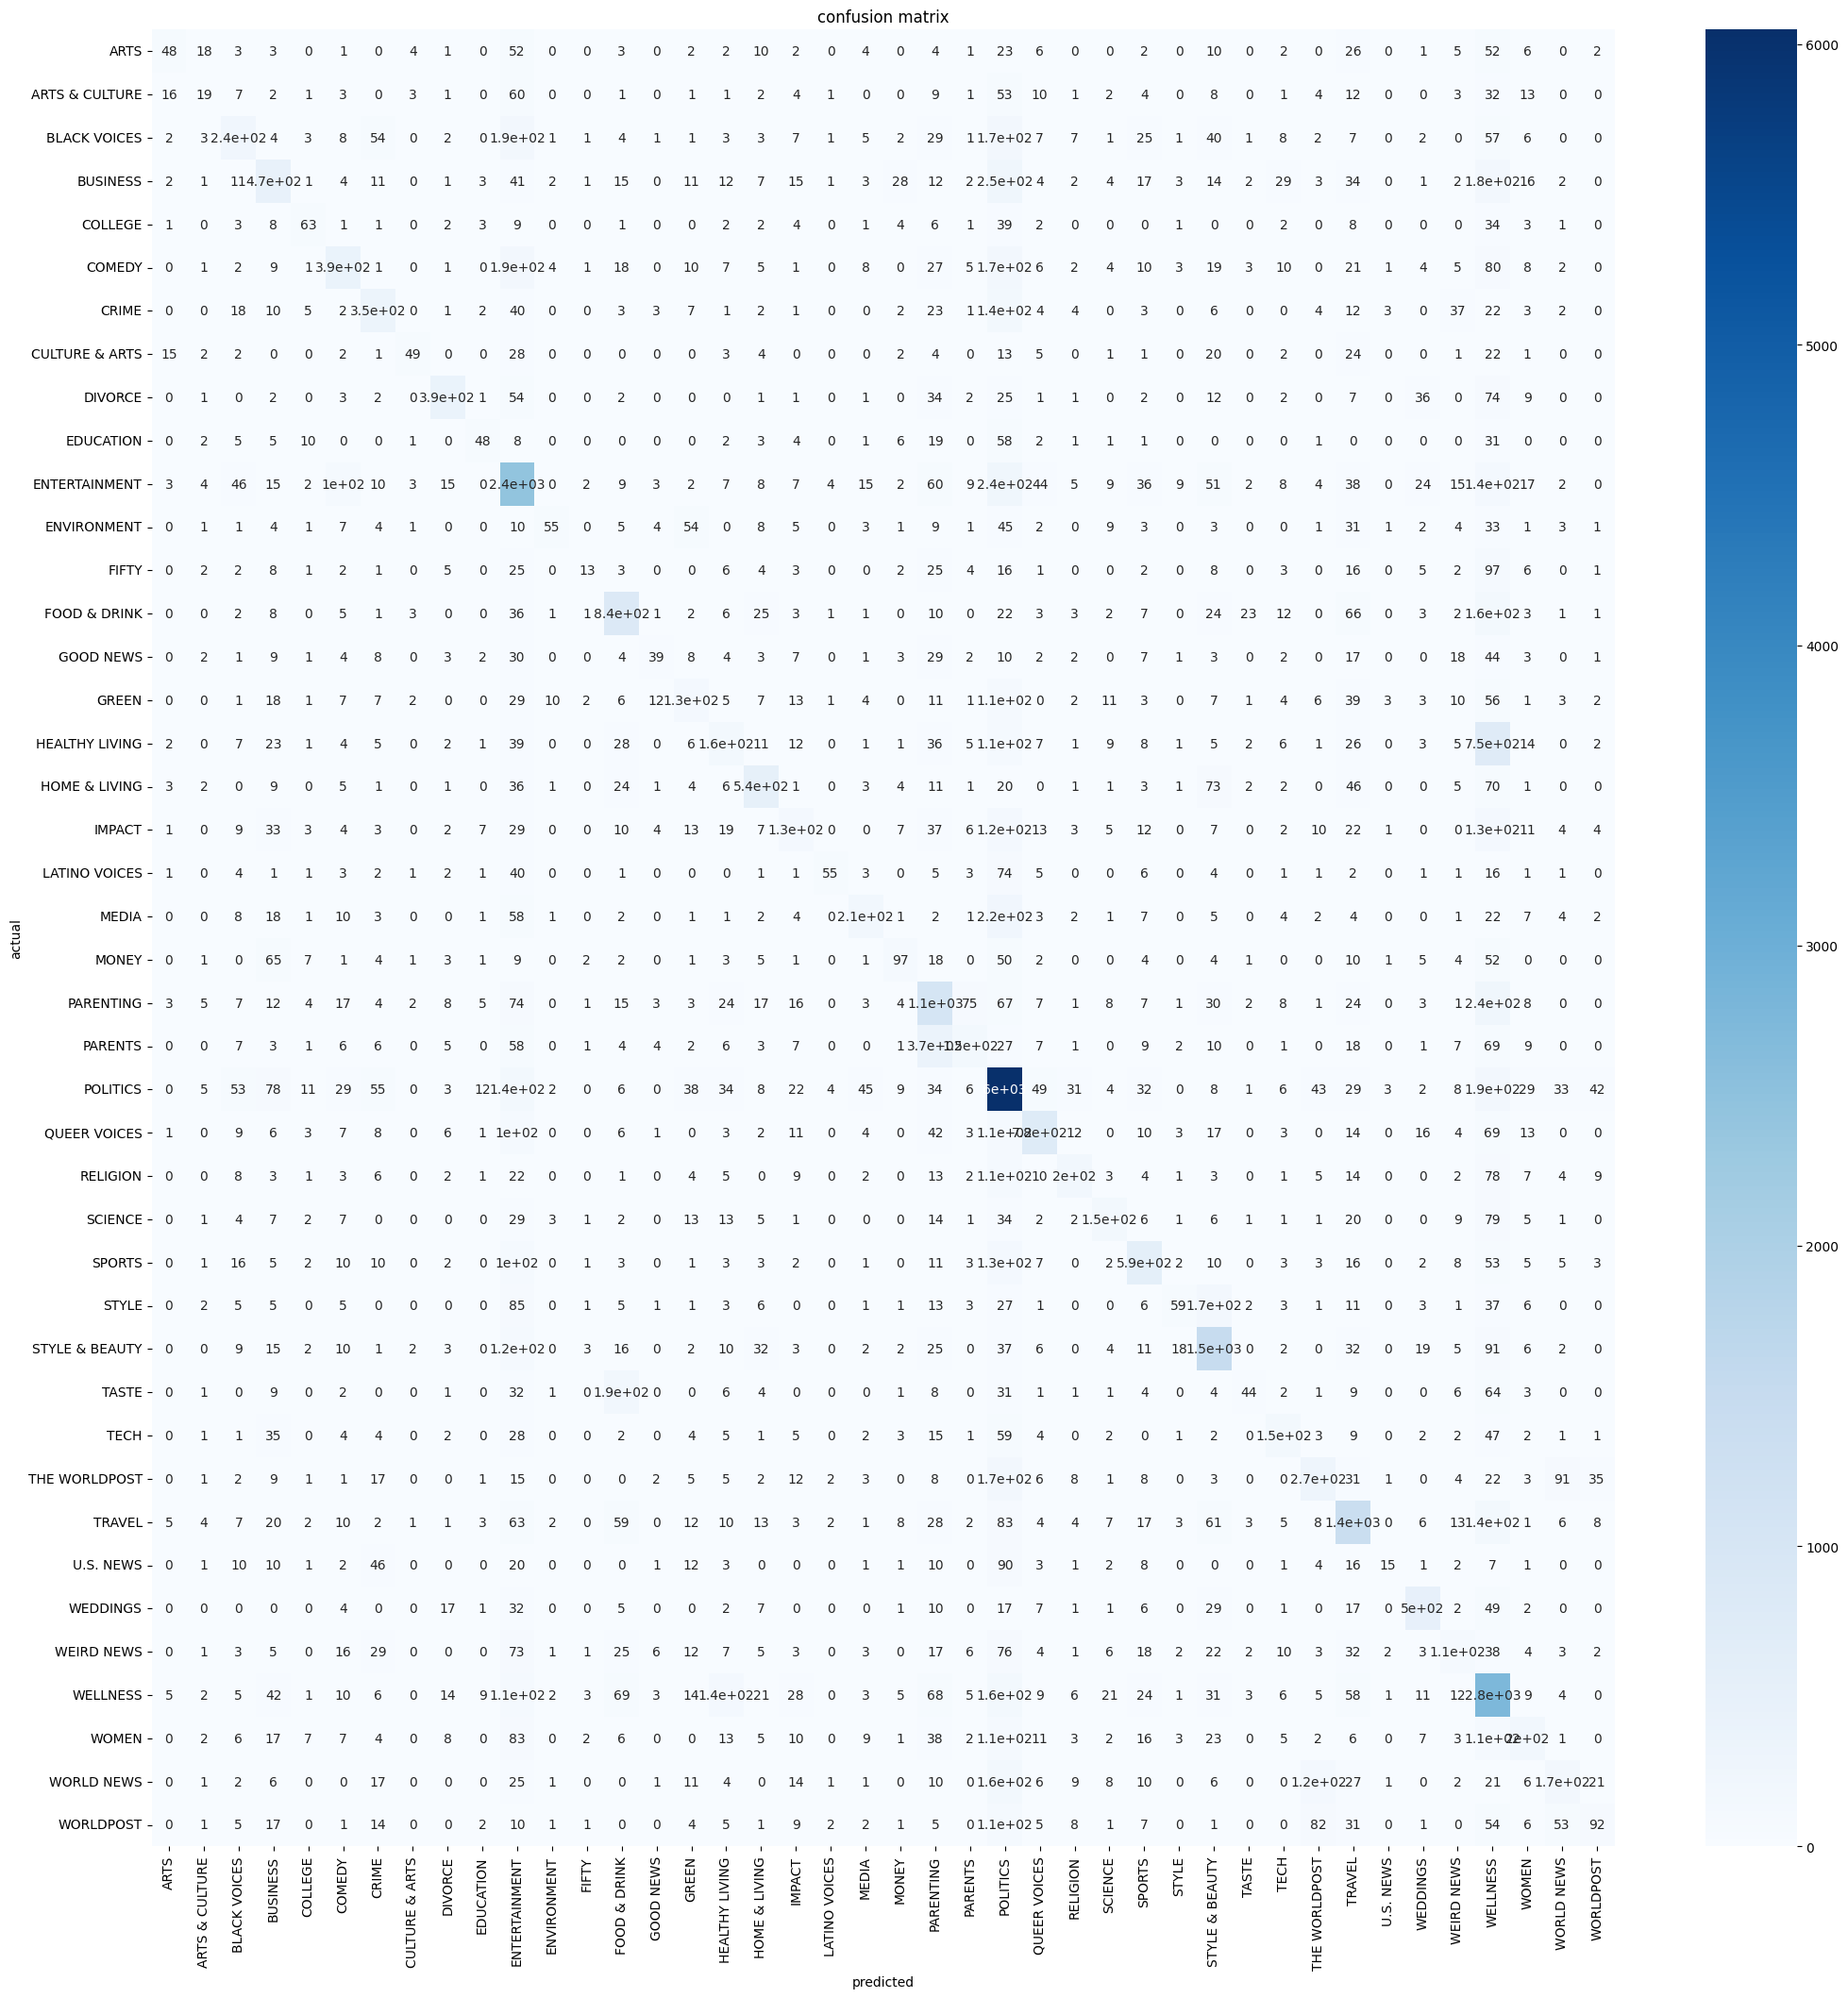

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred=model.predict(x_test_tfidf)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=model.classes_,yticklabels=model.classes_)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()



In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.5485849281725768
Classification Report:
                 precision    recall  f1-score   support

          ARTS       0.44      0.16      0.24       293
ARTS & CULTURE       0.22      0.07      0.10       275
  BLACK VOICES       0.45      0.27      0.33       889
      BUSINESS       0.46      0.38      0.42      1216
       COLLEGE       0.45      0.31      0.37       202
        COMEDY       0.54      0.38      0.45      1022
         CRIME       0.50      0.49      0.50       713
CULTURE & ARTS       0.67      0.24      0.36       202
       DIVORCE       0.77      0.59      0.67       664
     EDUCATION       0.46      0.23      0.31       209
 ENTERTAINMENT       0.52      0.71      0.60      3419
   ENVIRONMENT       0.62      0.18      0.27       313
         FIFTY       0.34      0.05      0.09       263
  FOOD & DRINK       0.60      0.66      0.63      1270
     GOOD NEWS       0.43      0.14      0.22       270
         GREEN       0.34      0.25      0.29     

In [ ]:
sample_news = [
    "Apple launches new iPhone model",
    "NASA plans new mission to Mars",
    "Team wins WorldCup"
]

sample_news_clean = [clean_text(t) for t in sample_news]
sample_news_tfidf = vectorizer.transform(sample_news_clean)

predictions = model.predict(sample_news_tfidf)

for news, pred in zip(sample_news, predictions):
    print(f"News: {news} --> Predicted Category: {pred}")

News: Apple launches new iPhone model --> Predicted Category: TECH
News: NASA plans new mission to Mars --> Predicted Category: SCIENCE
News: Team wins WorldCup --> Predicted Category: SPORTS


In [ ]:
import joblib#used to save the trained model in .pkl format
joblib.dump(vectorizer,'vectorizer.pkl')
joblib.dump(model,'model.pkl')